In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBILPCH/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBILPCH/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBILPCH/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 979s 2s/step - loss: 0.6119 - accuracy: 0.6333 - val_loss: 0.5256 - val_accuracy: 0.7748
Epoch 2/10
391/391 [==============================] - 1004s 3s/step - loss: 0.4113 - accuracy: 0.8320 - val_loss: 0.5448 - val_accuracy: 0.7658
Epoch 3/10
391/391 [==============================] - 1004s 3s/step - loss: 0.5198 - accuracy: 0.7356 - val_loss: 0.5390 - val_accuracy: 0.7854
Epoch 4/10
391/391 [==============================] - 1015s 3s/step - loss: 0.3916 - accuracy: 0.8385 - val_loss: 0.4548 - val_accuracy: 0.7968
Epoch 5/10
391/391 [==============================] - 1009s 3s/step - loss: 0.2726 - accuracy: 0.8975 - val_loss: 0.4376 - val_accuracy: 0.8346
Epoch 6/10
391/391 [==============================] - 1018s 3s/step - loss: 0.3358 - accuracy: 0.8700 - val_loss: 0.5048 - val_accuracy: 0.7921
Epoch 7/10
391/391 [==============================] - 1017s 3s/step - loss: 0.2163 - accuracy: 0.9217 - val_loss: 0.4642 - val_accuracy: 

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

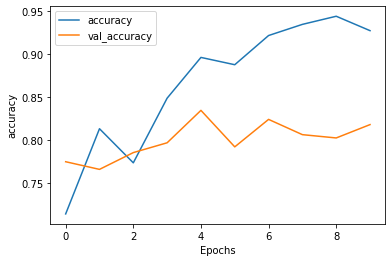

In [9]:
plot_graphs(history, 'accuracy')

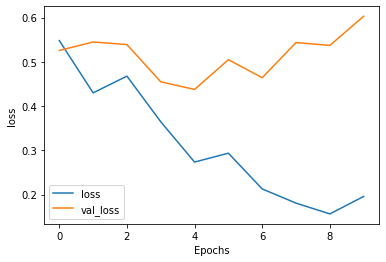

In [10]:
plot_graphs(history, 'loss')